In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from  sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score

In [2]:
original_df = pd.DataFrame(pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx'))
original_df.dropna(inplace = True)
original_df.reset_index(inplace = True,drop = True)
original_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
initial_df  = original_df.copy()

In [4]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [5]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    
        initial_df[category] = le.fit_transform(initial_df[category].astype(str))
        
        
initial_df        

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,6,0,2.55,4048,35
1,0,2649,3724,6,0,3.39,4048,35
2,0,2855,861,8,0,2.75,4048,35
3,0,2803,1813,6,0,3.39,4048,35
4,0,2802,2776,6,0,3.39,4048,35
...,...,...,...,...,...,...,...,...
406824,18535,1470,2263,12,20459,0.85,275,13
406825,18535,1746,695,6,20459,2.10,275,13
406826,18535,2086,701,4,20459,4.15,275,13
406827,18535,2087,700,4,20459,4.15,275,13


In [6]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  int64  
 1   StockCode    406829 non-null  int64  
 2   Description  406829 non-null  int64  
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  int64  
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int64  
 7   Country      406829 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.8 MB


In [7]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,9950.901755,1573.257501,2024.692726,12.061303,10895.552697,3.460471,2176.377102,32.827731
std,5552.295845,844.054584,1089.177346,248.693370,5975.017014,69.315162,1255.543861,6.738565
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,0.000000,0.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,5635.000000,1.250000,1196.000000,35.000000
50%,10310.000000,1522.000000,1987.000000,5.000000,11447.000000,1.950000,2073.000000,35.000000
75%,14651.000000,2106.000000,2945.000000,12.000000,16148.000000,3.750000,3287.000000,35.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,20459.000000,38970.000000,4371.000000,36.000000


In [8]:
initial_df.drop(axis=1,columns='InvoiceDate',inplace=True)
wrong_data = initial_df[initial_df['Quantity']<0].index
wrong_data
initial_df.drop(index=wrong_data,axis=0,inplace=True)
initial_df.reset_index(drop=True,inplace=True)
initial_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,0,3249,3716,6,2.55,4048,35
1,0,2649,3724,6,3.39,4048,35
2,0,2855,861,8,2.75,4048,35
3,0,2803,1813,6,3.39,4048,35
4,0,2802,2776,6,3.39,4048,35
...,...,...,...,...,...,...,...
397919,18535,1470,2263,12,0.85,275,13
397920,18535,1746,695,6,2.10,275,13
397921,18535,2086,701,4,4.15,275,13
397922,18535,2087,700,4,4.15,275,13


In [9]:
initial_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,9716.398983,1570.578022,2024.882372,13.021823,3.116174,2181.236950,32.846476
std,5383.327369,842.859229,1089.516820,180.420210,22.096788,1255.222567,6.711504
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4945.000000,936.000000,1143.000000,2.000000,1.250000,1206.000000,35.000000
50%,10123.000000,1521.000000,1987.000000,6.000000,1.950000,2079.000000,35.000000
75%,14414.000000,2106.000000,2947.000000,12.000000,3.750000,3291.000000,35.000000
max,18535.000000,3683.000000,3895.000000,80995.000000,8142.750000,4371.000000,36.000000


In [10]:
scaler = MinMaxScaler(feature_range=(1,5))
normalized_array = scaler.fit_transform(initial_df)
normalized_df = pd.DataFrame(normalized_array,columns=initial_df.columns)
normalized_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1.0,4.528645,4.816175,1.000247,1.001253,4.704415,4.888889
1,1.0,3.877002,4.824390,1.000247,1.001665,4.704415,4.888889
2,1.0,4.100733,1.884211,1.000346,1.001351,4.704415,4.888889
3,1.0,4.044257,2.861874,1.000247,1.001665,4.704415,4.888889
4,1.0,4.043171,3.850834,1.000247,1.001665,4.704415,4.888889
...,...,...,...,...,...,...,...
397919,5.0,2.596525,3.324005,1.000543,1.000418,1.251659,2.444444
397920,5.0,2.896280,1.713736,1.000247,1.001032,1.251659,2.444444
397921,5.0,3.265544,1.719897,1.000148,1.002039,1.251659,2.444444
397922,5.0,3.266630,1.718870,1.000148,1.002039,1.251659,2.444444


In [11]:
normalized_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,3.096876,2.705759,3.079468,1.000594,1.001531,2.996099,4.649608
std,1.161765,0.915405,1.118888,0.008910,0.010855,1.148682,0.745723
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.067170,2.016563,2.173813,1.000049,1.000614,2.103638,4.888889
50%,3.184624,2.651914,3.040565,1.000247,1.000958,2.902539,4.888889
75%,4.110656,3.287266,4.026444,1.000543,1.001842,4.011668,4.888889
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


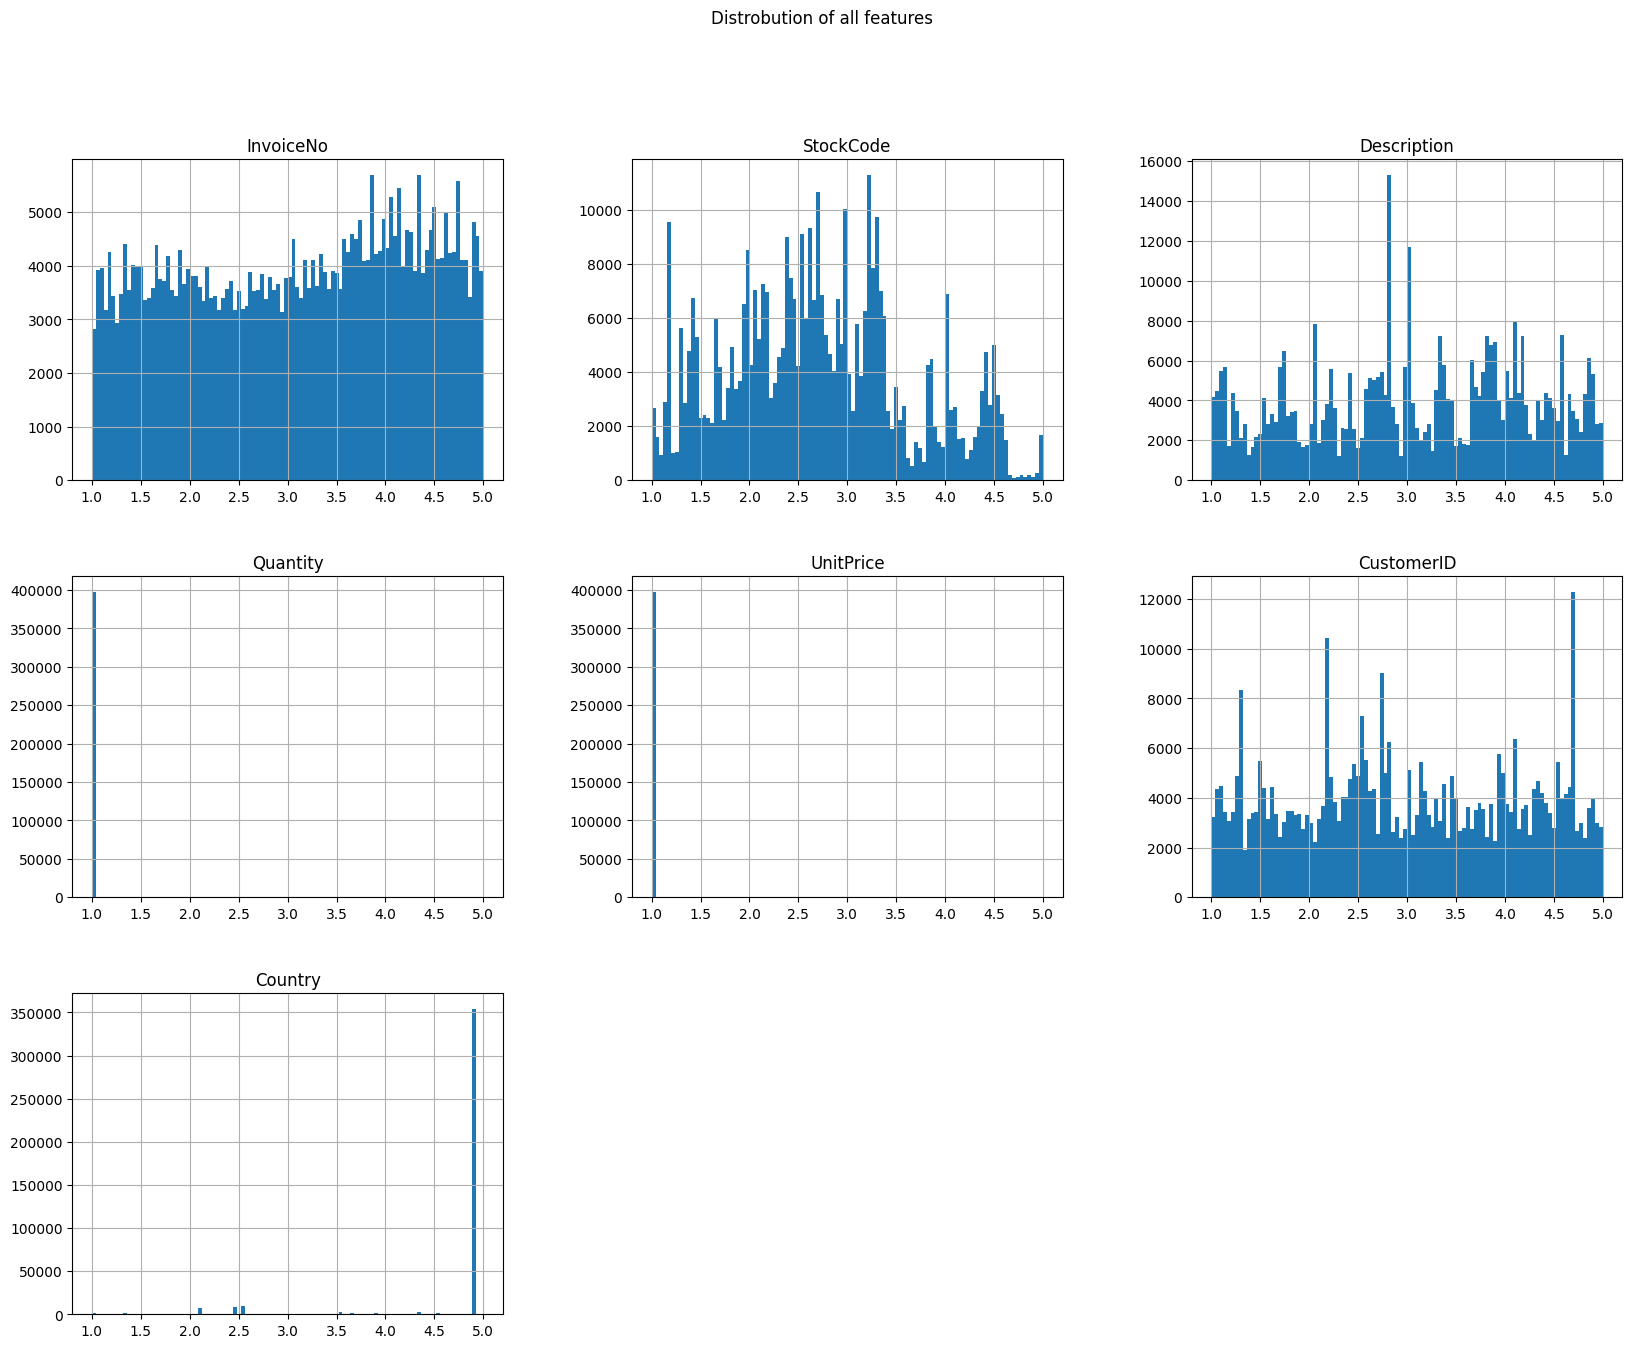

In [12]:
normalized_df.hist(bins=100,figsize=(20,15))
plt.suptitle('Distrobution of all features')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

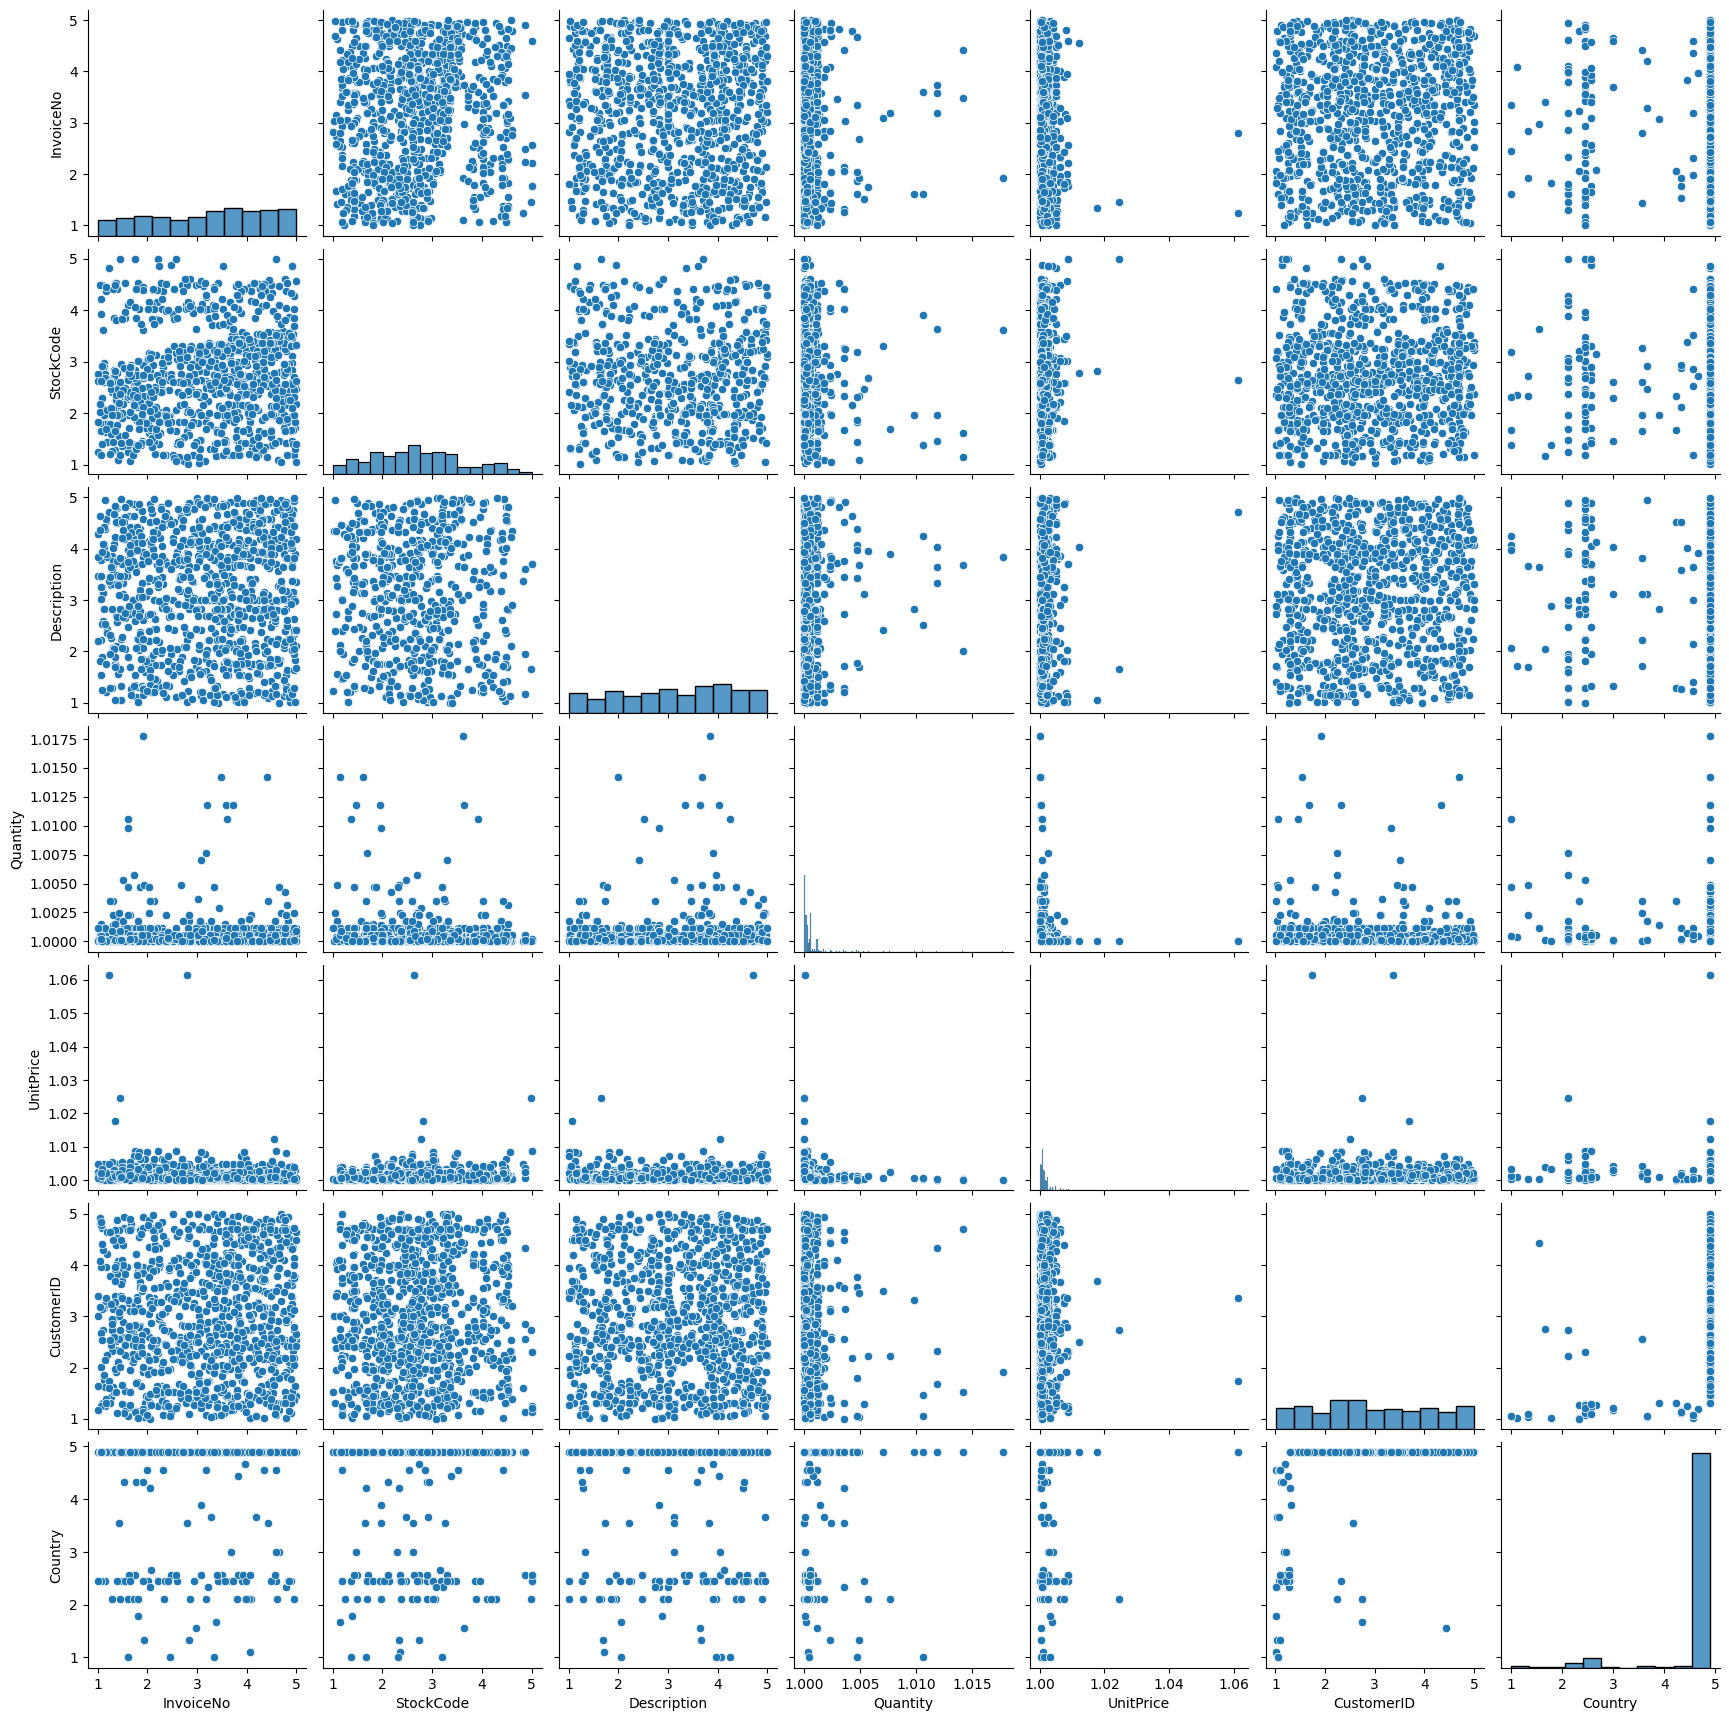

In [13]:
sns.pairplot(normalized_df.sample(1000))
plt.show()

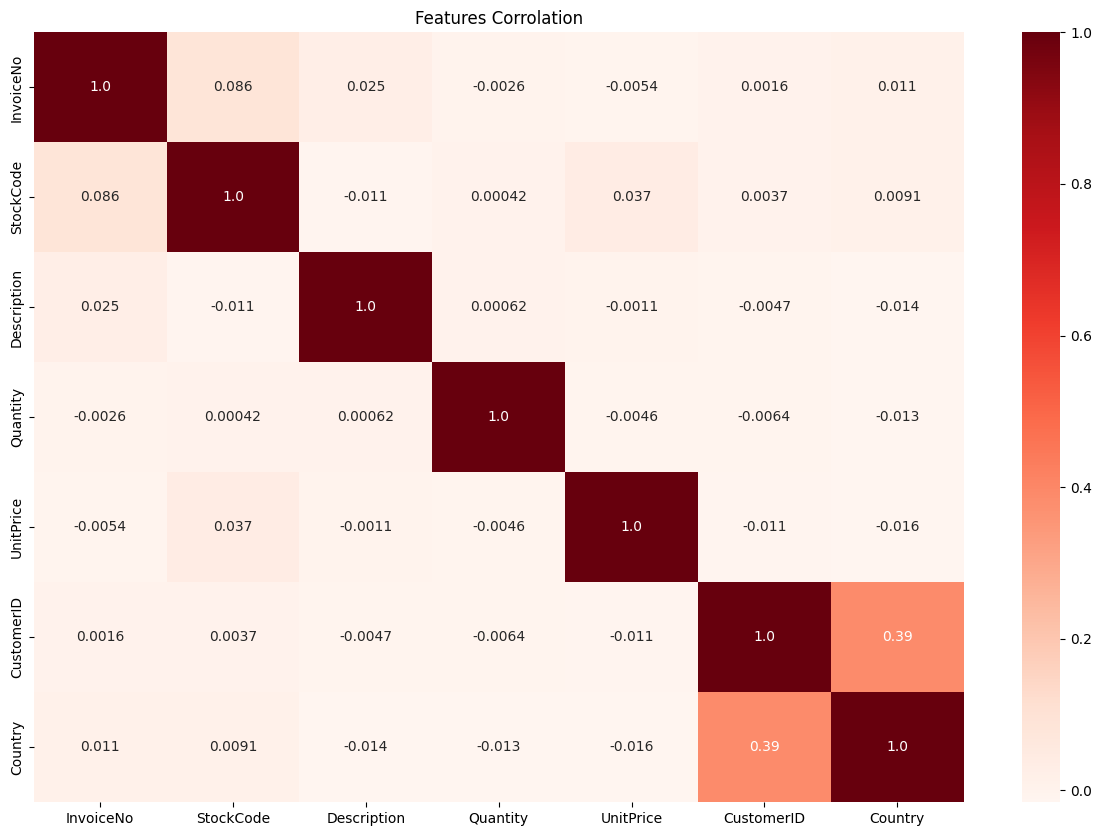

In [14]:
corr = normalized_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True,cmap = plt.cm.Reds, fmt = '0.2')
plt.title('Features Corrolation')
plt.show()

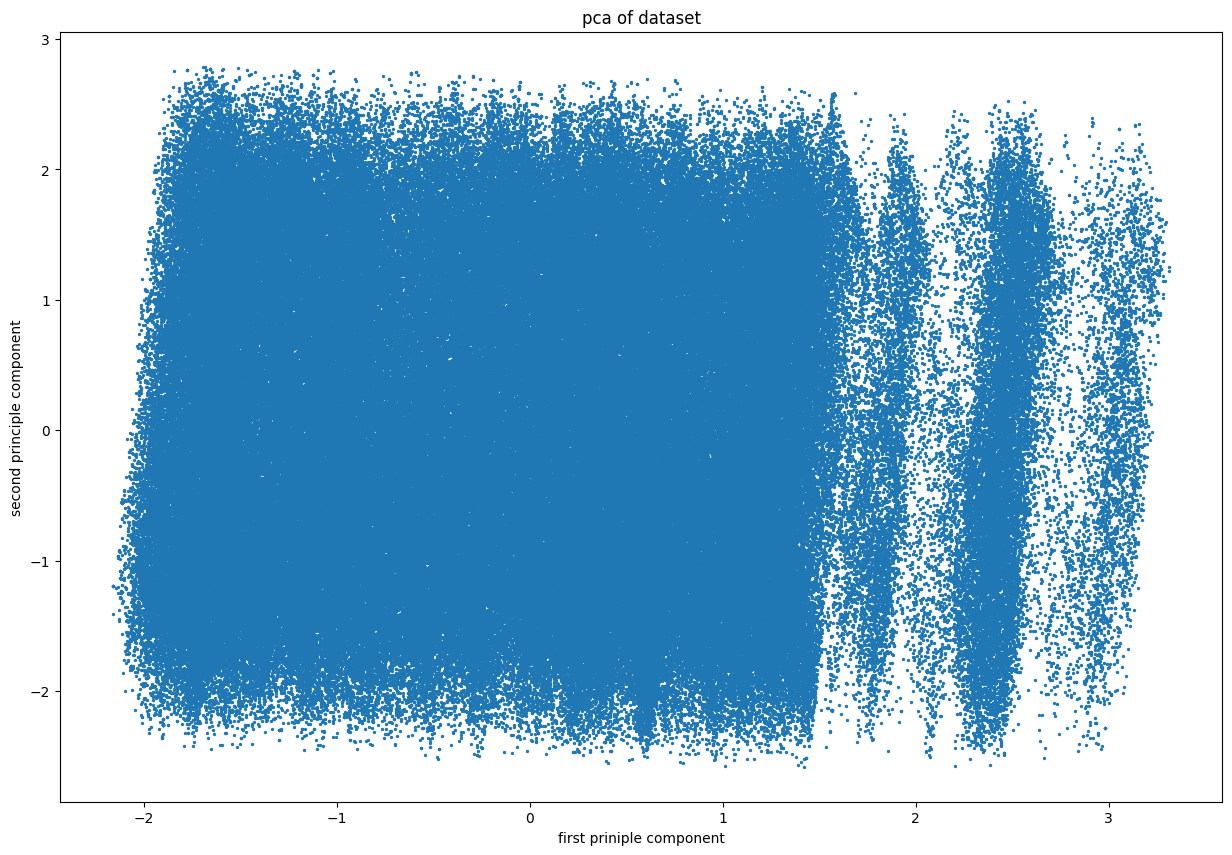

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('pca of dataset')
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


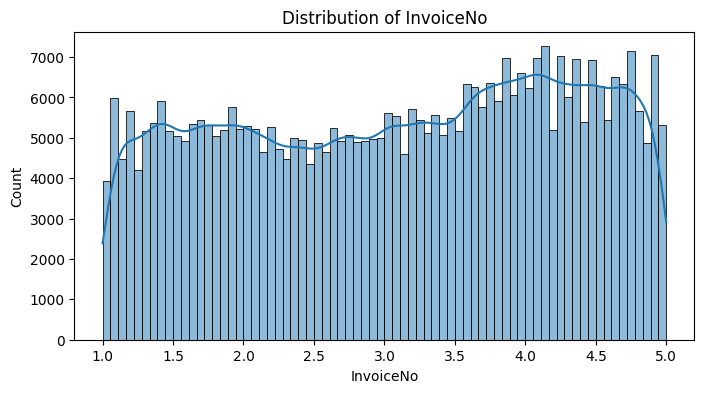

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


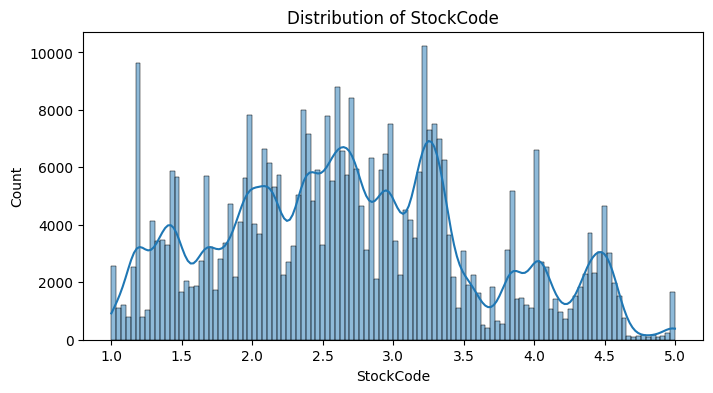

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


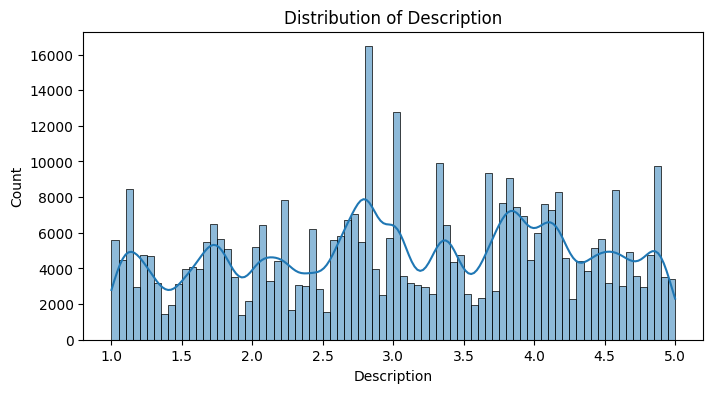

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


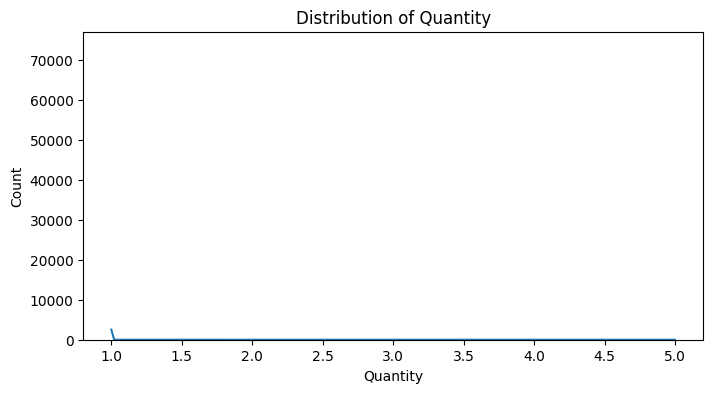

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


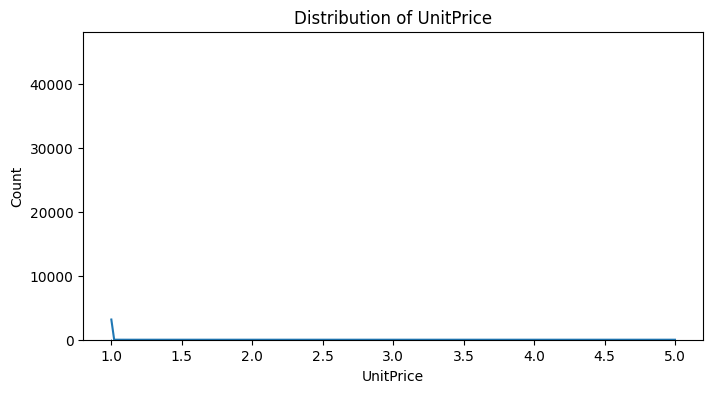

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


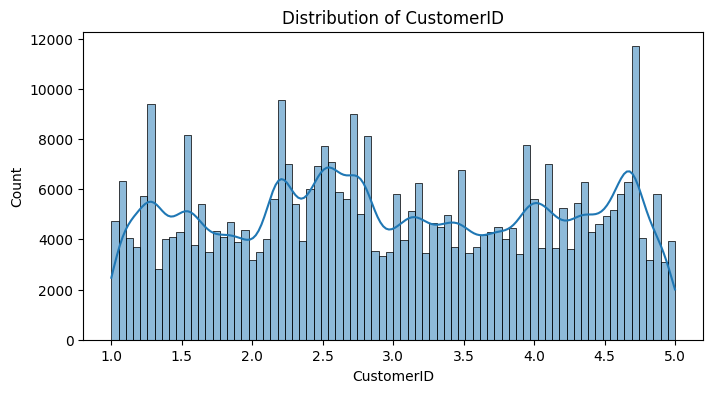

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


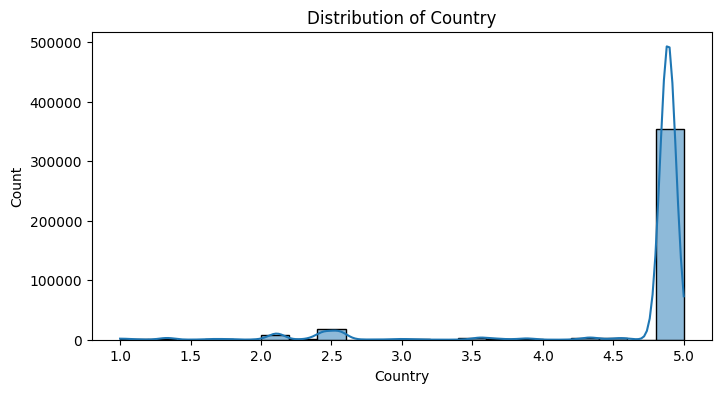

In [16]:
for col in normalized_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(normalized_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


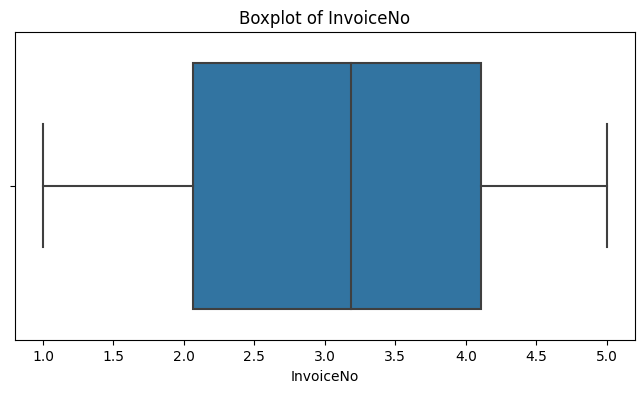

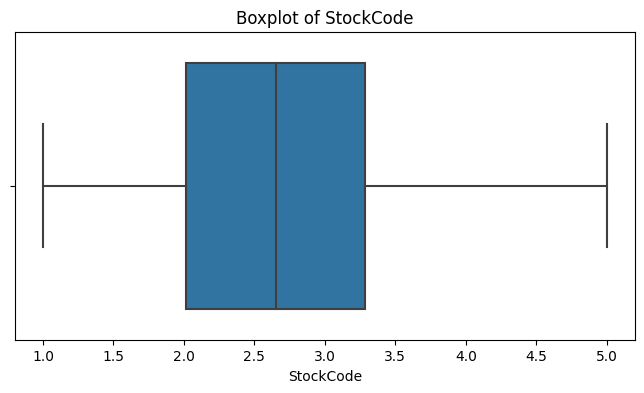

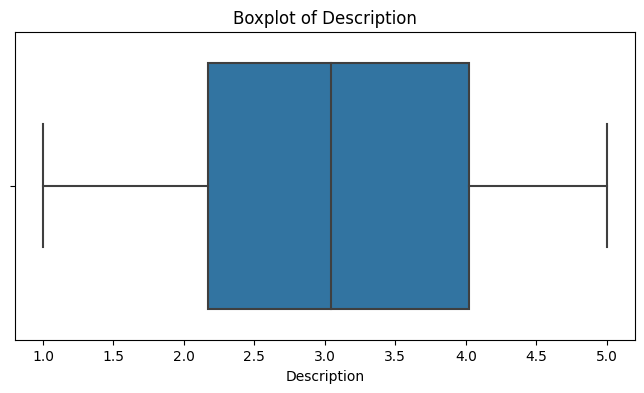

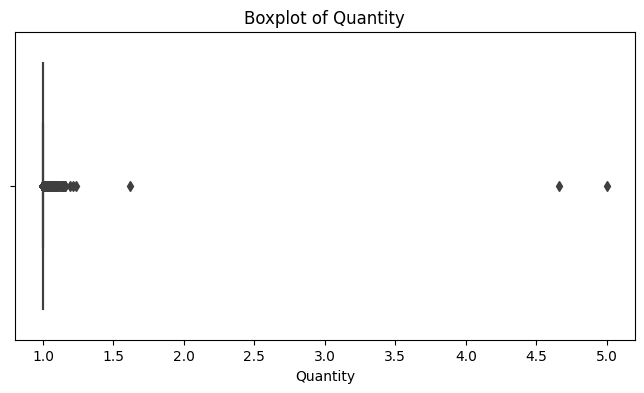

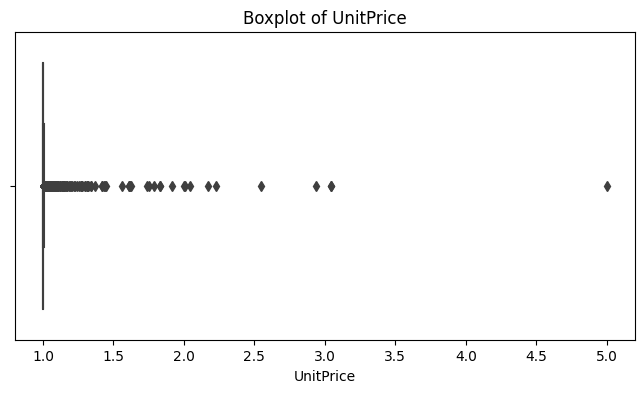

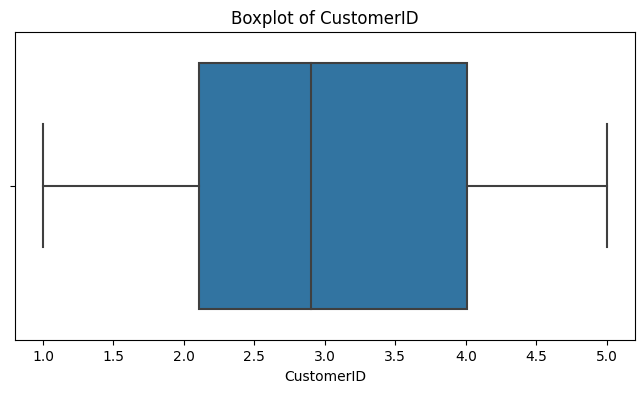

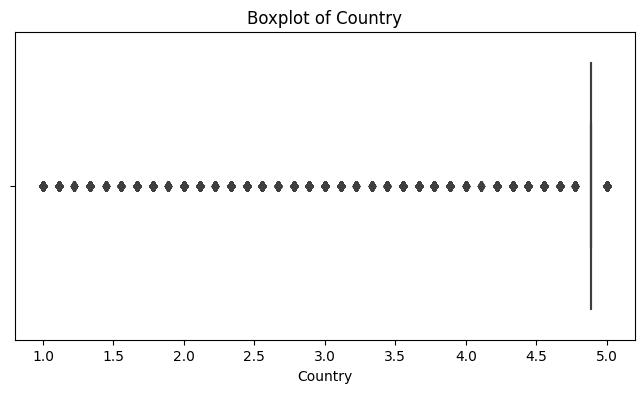

In [17]:
for col in normalized_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=normalized_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# K-means : 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

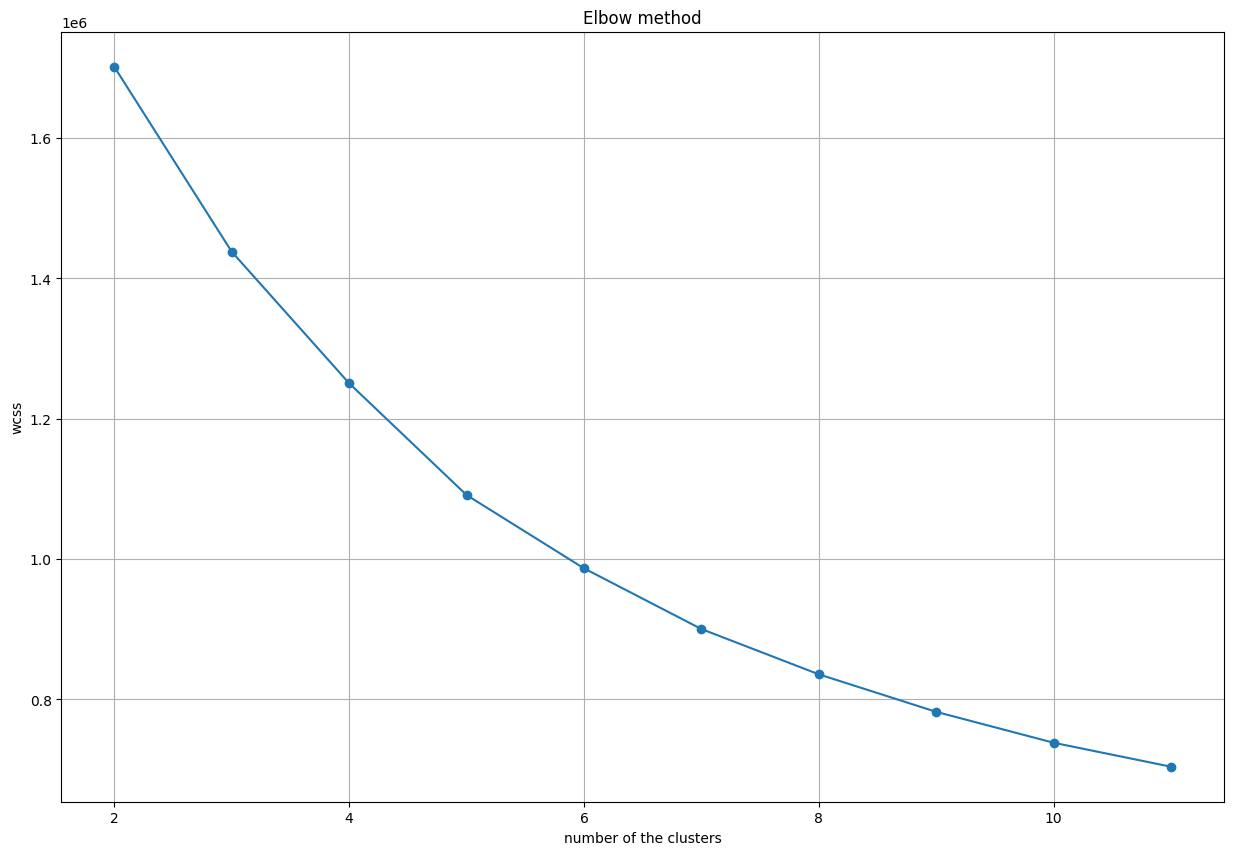

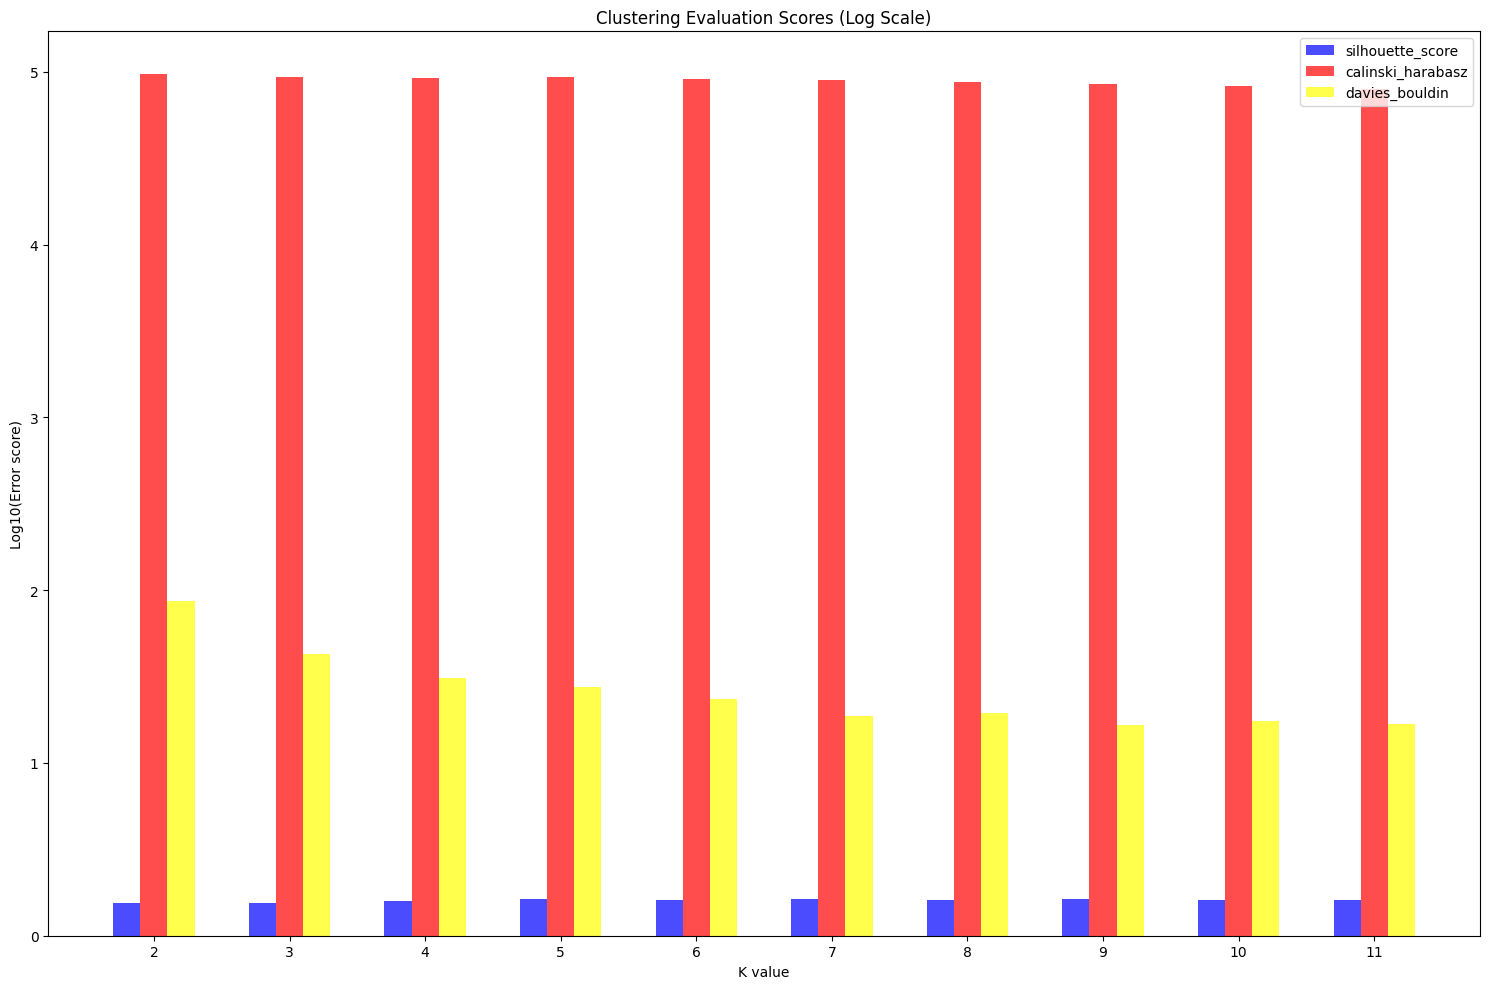

,k_value,silhouette_score,calinski_harabasz,davies_bouldin
0,2,0.189090,96647.845854,1.934824
1,3,0.188263,93651.112812,1.630681
2,4,0.202895,91680.567839,1.493925
3,5,0.210579,93317.792726,1.441949
4,6,0.204397,90984.715012,1.371621
5,7,0.209774,89480.205504,1.269718
6,8,0.204388,87011.806188,1.290547
7,9,0.210042,84742.493579,1.220189
8,10,0.205826,82459.021447,1.244580
9,11,0.205207,79745.896493,1.227348


In [18]:
wcss = []
si_score,ca_score,da_score = [],[],[]
k_value = [i for i in range (2,12)]

for k in range(2,12):
    
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(normalized_df)
    labels = km.predict(normalized_df)
    
    #evaluation process
    
    si_score.append(silhouette_score(normalized_df,labels,sample_size=30000))
    ca_score.append(calinski_harabasz_score(normalized_df,labels))
    da_score.append(davies_bouldin_score(normalized_df,labels))
    wcss.append(km.inertia_)
    
    
    # ploting process
    
plt.figure(figsize=(15,10))
plt.plot(range(2,12),wcss,marker = 'o')
plt.xlabel('number of the clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.grid()
plt.show()


plt.figure(figsize=(15,10))
bar_width = 0.2
index = np.arange(len(k_value))
plt.bar(index,si_score ,bar_width,label = 'silhouette_score',color = 'blue',alpha = 0.7)
plt.bar(index + bar_width ,np.log10(ca_score),bar_width,label = 'calinski_harabasz',color = 'red',alpha = 0.7)
plt.bar(index + 2*bar_width ,da_score,bar_width,label = 'davies_bouldin',color = 'yellow',alpha = 0.7)

plt.xlabel('K value')
plt.ylabel('Log10(Error score)')
plt.title('Clustering Evaluation Scores (Log Scale)')
plt.xticks(index+bar_width,k_value)
plt.legend()
plt.tight_layout()
plt.show()

error_dic = {'k_value':k_value,
             'silhouette_score':si_score,
             'calinski_harabasz':ca_score,
             'davies_bouldin':da_score}

error_df = pd.DataFrame(error_dic)
error_df

    
    


In [19]:
km = KMeans(n_clusters=5,random_state=0)
km.fit(normalized_df)
labels = km.predict(normalized_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


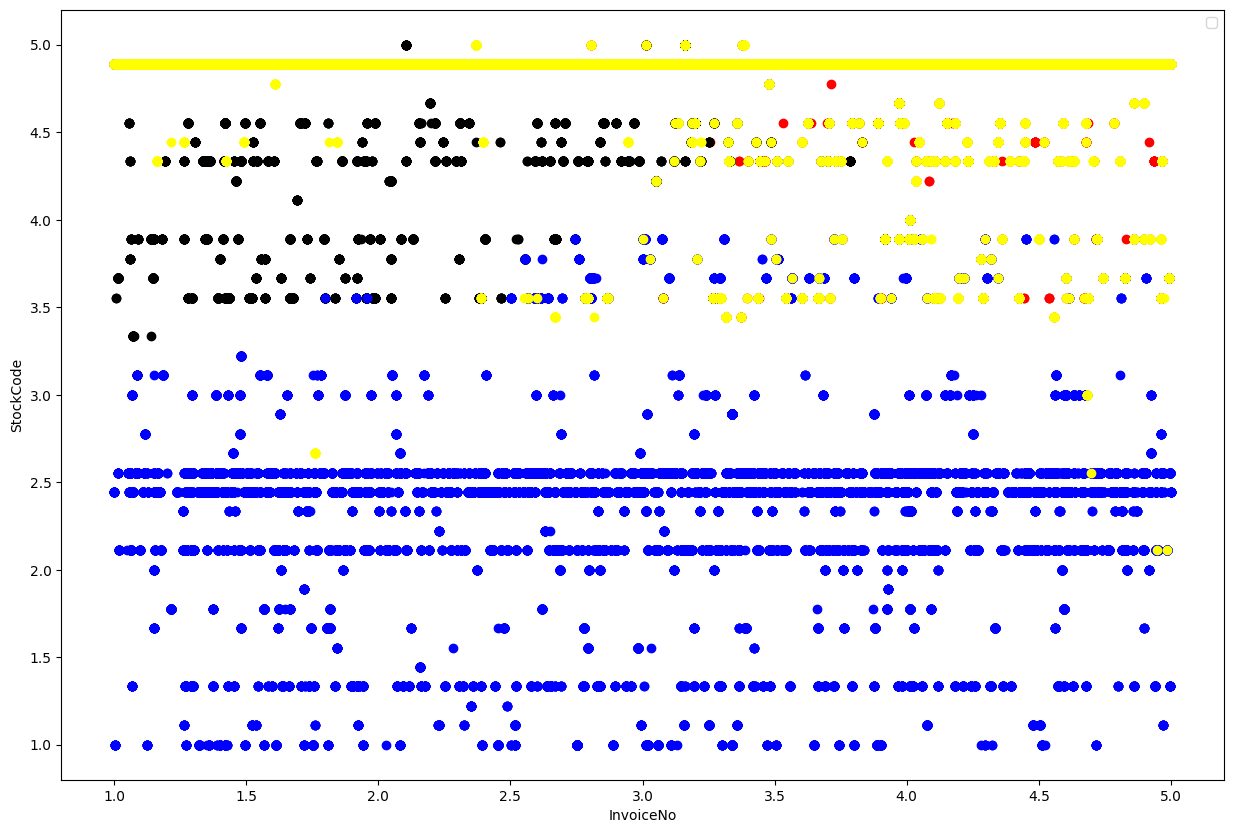

In [20]:
normalized_df['K-mean-cluster'] = labels
df_1 = normalized_df[normalized_df['K-mean-cluster'] == 0]
df_2 = normalized_df[normalized_df['K-mean-cluster'] == 1]
df_3 = normalized_df[normalized_df['K-mean-cluster'] == 2]
df_4 = normalized_df[normalized_df['K-mean-cluster'] == 3]
df_5 = normalized_df[normalized_df['K-mean-cluster'] == 4]

plt.figure(figsize=(15,10))
plt.scatter(df_1.InvoiceNo,df_1.Country,color = 'red')
plt.scatter(df_2.InvoiceNo,df_2.Country,color = 'black')
plt.scatter(df_3.InvoiceNo,df_3.Country,color = 'blue')
plt.scatter(df_4.InvoiceNo,df_4.Country,color = 'yellow')
plt.scatter(df_5.InvoiceNo,df_5.Country,color = 'yellow')


plt.xlabel('InvoiceNo')
plt.ylabel('StockCode')
plt.legend()


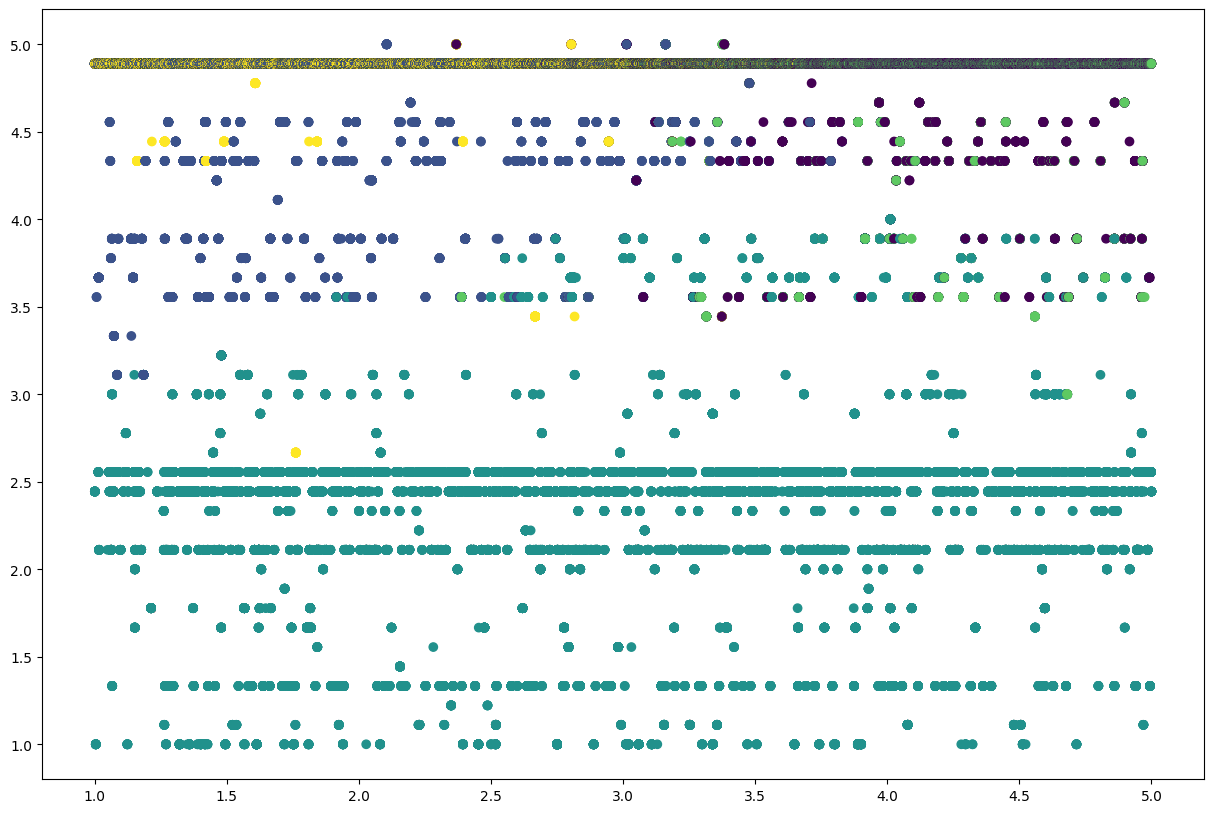

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(normalized_df.InvoiceNo,normalized_df.Country,c = normalized_df['K-mean-cluster'])

In [22]:
for i in range(2,6) :

    pca = PCA(n_components=i,random_state=0)
    pca_result = pca.fit_transform(normalized_df)
    explained_variance = pca.explained_variance_ratio_
    print(f'{i} component cover {np.sum(explained_variance)}')

2 component cover 0.5779854022173574
3 component cover 0.7491791464542608
4 component cover 0.8577790174619746
5 component cover 0.9524276212136896


the explained variance result : [0.39150206 0.18648335 0.17119374 0.10859987]


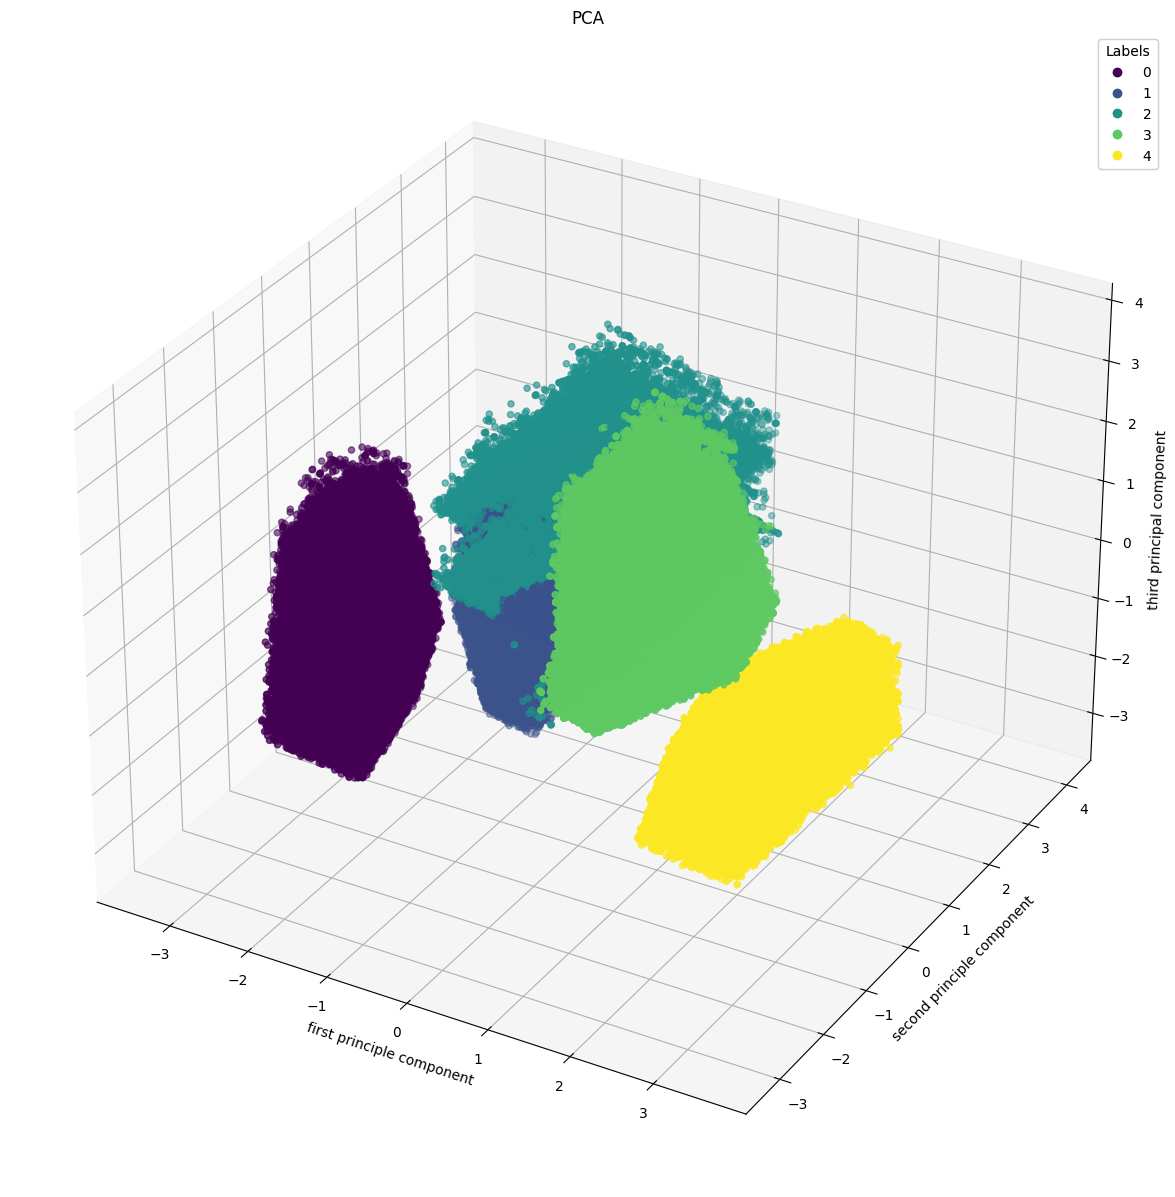

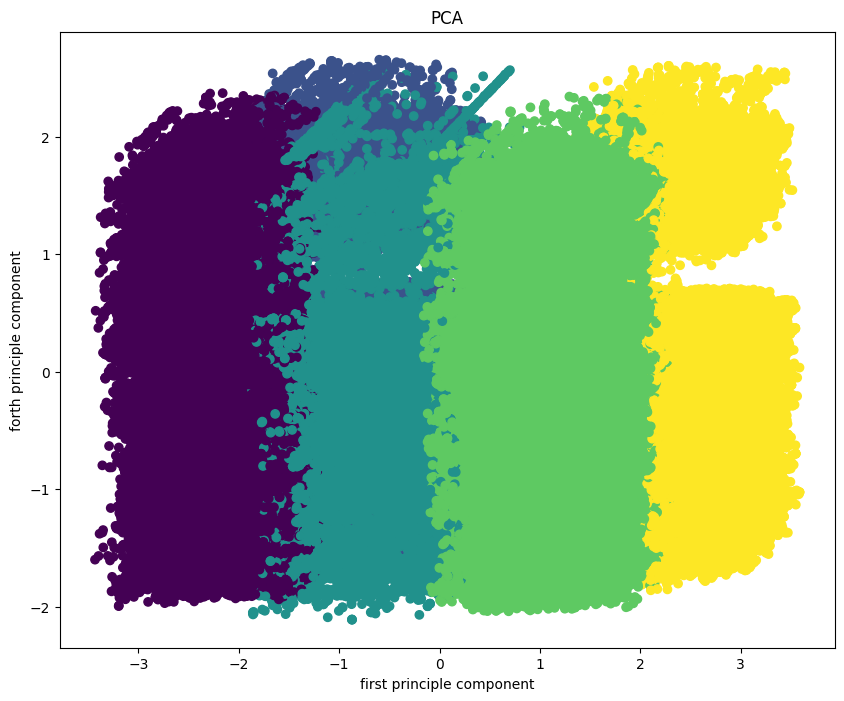

In [23]:
pca = PCA(n_components=4,random_state=0)
pca_result = pca.fit_transform(normalized_df)
print(f'the explained variance result : {pca.explained_variance_ratio_}')

plt.figure(figsize=(25,15))
ax = plt.axes(projection = '3d')

scatter = ax.scatter3D(pca_result[:,0],pca_result[:,1],pca_result[:,2],c=labels)
plt.xlabel('first principle component')
plt.ylabel('second principle component')
ax.set_zlabel('third principal component')
plt.title('PCA')
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,3],c=labels)
plt.xlabel('first principle component')
plt.ylabel('forth principle component')
plt.title('PCA')
plt.show()

# Mean Shift

In [24]:
sample_data = normalized_df.sample(5000)
sample_data.reset_index(drop=True,inplace=True)
sample_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,K-mean-cluster
0,4.794767,1.491990,4.647754,1.000444,1.003905,1.473118,4.888889,0
1,1.460318,1.552810,4.552246,1.000247,1.000614,2.581332,4.888889,1
2,2.534610,3.822699,3.418485,1.000543,1.002432,1.519790,4.888889,1
3,2.636687,1.629921,4.547112,1.000049,1.001449,4.531457,4.888889,4
4,2.492743,1.796090,1.263928,1.000543,1.000418,3.320750,4.888889,3
...,...,...,...,...,...,...,...,...
4995,3.284974,2.283736,1.842105,1.000247,1.001253,4.856326,4.888889,4
4996,3.268357,1.175944,2.829012,1.000148,1.001022,2.477923,4.888889,1
4997,4.198921,3.356774,1.730167,1.000247,1.001022,1.786090,4.888889,3
4998,3.974265,1.663589,3.836457,1.001185,1.000206,1.535347,4.888889,0


In [25]:
bandwith = estimate_bandwidth(sample_data,quantile=0.2,random_state=0)
bandwith

2.6685288536590384

In [26]:
ms = MeanShift(bandwidth=2.5)
ms.fit(sample_data)
ms_label = ms.labels_
ms_center = ms.cluster_centers_
np.unique(ms_label)

array([0, 1, 2])

In [27]:
sample_data['Mean-shift-cluster'] = ms_label
sample_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,K-mean-cluster,Mean-shift-cluster
0,4.794767,1.491990,4.647754,1.000444,1.003905,1.473118,4.888889,0,0
1,1.460318,1.552810,4.552246,1.000247,1.000614,2.581332,4.888889,1,0
2,2.534610,3.822699,3.418485,1.000543,1.002432,1.519790,4.888889,1,0
3,2.636687,1.629921,4.547112,1.000049,1.001449,4.531457,4.888889,4,1
4,2.492743,1.796090,1.263928,1.000543,1.000418,3.320750,4.888889,3,1
...,...,...,...,...,...,...,...,...,...
4995,3.284974,2.283736,1.842105,1.000247,1.001253,4.856326,4.888889,4,1
4996,3.268357,1.175944,2.829012,1.000148,1.001022,2.477923,4.888889,1,0
4997,4.198921,3.356774,1.730167,1.000247,1.001022,1.786090,4.888889,3,1
4998,3.974265,1.663589,3.836457,1.001185,1.000206,1.535347,4.888889,0,0


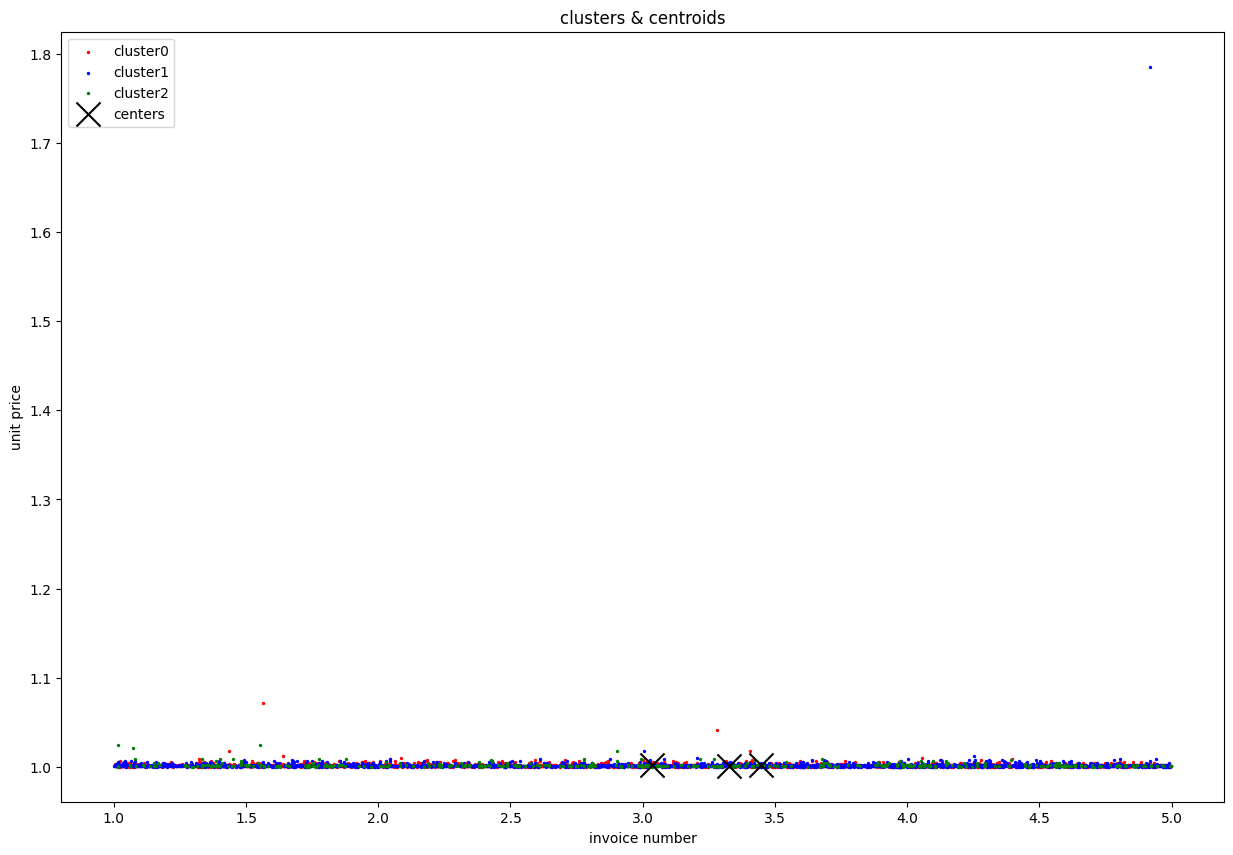

In [28]:
plt.figure(figsize=(15,10))
unique_clusters = np.unique(ms_label)
color_dic = {0:'red',1:'blue',2:'green'}
for i in unique_clusters : 
    df = sample_data[sample_data['Mean-shift-cluster'] == i]
    labels = df['Mean-shift-cluster']
    plt.scatter(df.iloc[:,0],df.iloc[:,4],color = color_dic[i],label = f'cluster{i}',s = 2)

    
plt.scatter(ms_center[:,0],ms_center[:,4],color = 'black', s = 300, marker = 'x',label = 'centers')
plt.xlabel('invoice number')
plt.ylabel('unit price')
plt.title('clusters & centroids')
plt.legend()
plt.show()